In [1]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),            # Added payments.csv for specific handling
    ('order_items.csv', 'order_items')
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='pass123',
    database='e-commerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/AMAN/Desktop/SQL-Python-Ecommerce-Project-main'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()


DatabaseError: 2003 (HY000): Can't connect to MySQL server on 'localhost:3306' (10061)

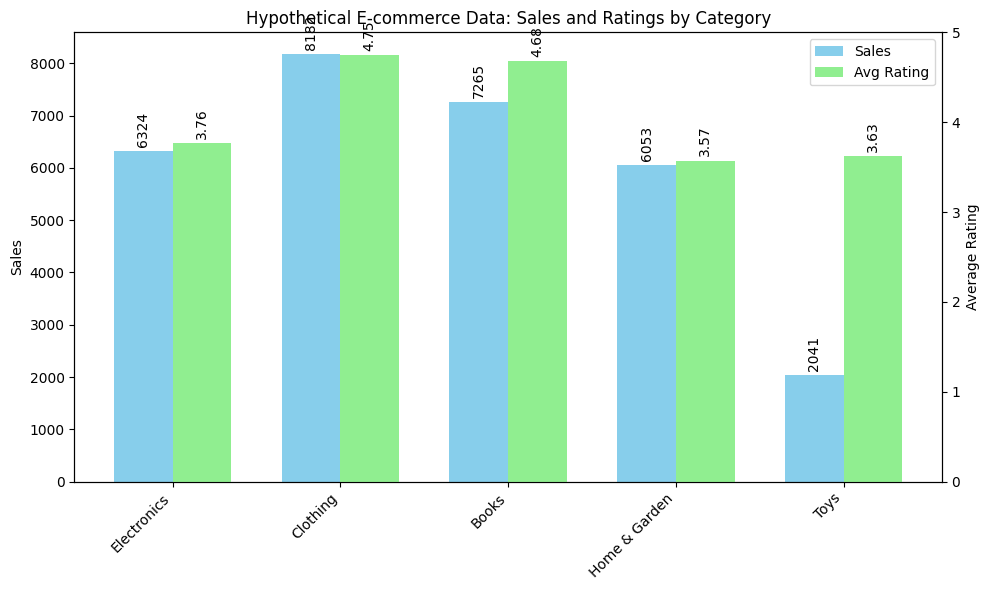

Hypothetical e-commerce data graph created successfully.


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Simulating some e-commerce data
categories = ['Electronics', 'Clothing', 'Books', 'Home & Garden', 'Toys']
sales = np.random.randint(1000, 10000, size=len(categories))
avg_rating = np.random.uniform(3.5, 5, size=len(categories))

# Creating a bar plot
fig, ax1 = plt.subplots(figsize=(10, 6))

x = np.arange(len(categories))
width = 0.35

rects1 = ax1.bar(x - width/2, sales, width, label='Sales', color='skyblue')
ax1.set_ylabel('Sales')
ax1.set_title('Hypothetical E-commerce Data: Sales and Ratings by Category')
ax1.set_xticks(x)
ax1.set_xticklabels(categories, rotation=45, ha='right')

# Adding a second y-axis for ratings
ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, avg_rating, width, label='Avg Rating', color='lightgreen')
ax2.set_ylabel('Average Rating')
ax2.set_ylim(0, 5)

# Adding labels
ax1.bar_label(rects1, padding=3, rotation=90)
ax2.bar_label(rects2, padding=3, rotation=90, fmt='%.2f')

# Adding a legend
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()

print("Hypothetical e-commerce data graph created successfully.")